<a href="https://colab.research.google.com/github/sir-sauc3/comp215-Project1/blob/main/Sos%26Roberto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# this is our key: k_w26fb6h9
# api url top 250 movies: https://imdb-api.com/en/API/Top250Movies/k_w26fb6h9
# api url for movie casst: https://imdb-api.com/en/API/FullCast/k_w26fb6h9/${movie ID}


In [11]:
import json, requests
from pprint import pprint
from dataclasses import dataclass
import matplotlib.pyplot as plt
import networkx as nx

In [12]:
@dataclass
class Actor:
  name : str
  id : str
  image : str

  @classmethod
  def createActor(cls, name, id, image):
    return cls(name, id, image)
    

@dataclass
class Movie:
  title : str
  id : str
  image: str

  @classmethod
  def createMovie(cls, title, id, image):
    return cls(title, id, image)

the data we need is a complete list if actors and a list of list of pairs of actors from the top250

In [13]:
API_KEY = 'k_w26fb6h9'

url = f'https://imdb-api.com/en/API/Top250Movies/k_w26fb6h9'

response = requests.request("GET", url, headers={}, data={})

data = json.loads(response.text)

movies = [(movie['title'],
          movie['id'],
          movie['image']) for movie in data['items']]


pprint(movies)

[('The Shawshank Redemption',
  'tt0111161',
  'https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_Ratio0.6716_AL_.jpg'),
 ('The Godfather',
  'tt0068646',
  'https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_Ratio0.7015_AL_.jpg'),
 ('The Dark Knight',
  'tt0468569',
  'https://m.media-amazon.com/images/M/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_Ratio0.6716_AL_.jpg'),
 ('The Godfather Part II',
  'tt0071562',
  'https://m.media-amazon.com/images/M/MV5BMWMwMGQzZTItY2JlNC00OWZiLWIyMDctNDk2ZDQ2YjRjMWQ0XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_Ratio0.7015_AL_.jpg'),
 ('12 Angry Men',
  'tt0050083',
  'https://m.media-amazon.com/images/M/MV5BMWU4N2FjNzYtNTVkNC00NzQ0LTg0MjAtYTJlMjFhNGUxZDFmXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_Ratio0.6716_AL_.jpg'),
 ("Schindler's List",
  'tt0108052',
  'https://m.media-amazon.com/images/M/MV5BNDE4OTMxMTctNmRhYy00NWE2LTg

In [14]:
movie_items = [data for data in data['items']]

#collects last two crew members (actors) from 'crew' key in items
crew = [[crew['crew'].split(', ')[-2], crew['crew'].split(', ')[-1]] for crew in data['items']]
# pprint(crew) #ONE OF THE THINGS WE NEED

allActors = set() #OTHER PIECE OF DATA WE NEED

for pair in crew:
  allActors.add(pair[0])
  allActors.add(pair[1])

pprint(allActors)

{'Aamir Khan',
 'Adrien Brody',
 'Akira Ishihama',
 'Akira Terao',
 'Al Pacino',
 'Alan Rickman',
 'Albert Brooks',
 'Albert Rémy',
 'Alec Guinness',
 'Aleksey Kravchenko',
 'Alexandra Maria Lara',
 'Alexandre Rodrigues',
 'Alfred Abel',
 'Amir Farrokh Hashemian',
 'Amy Poehler',
 'Andie MacDowell',
 'Andrew Garfield',
 'Anne Baxter',
 'Anne Hathaway',
 'Annette Bening',
 'Anthony Gonzalez',
 'Anthony Hopkins',
 'Anthony Perkins',
 'Ariadna Gil',
 'Arnold Schwarzenegger',
 'Audrey Tautou',
 'Ayano Shiraishi',
 'Barbara Stanwyck',
 'Bee Vang',
 'Ben Affleck',
 'Ben Burtt',
 'Ben Kingsley',
 'Bette Davis',
 'Bibi Andersson',
 'Bill Hader',
 'Bill Murray',
 'Billy Crystal',
 'Brad Garrett',
 'Brad Pitt',
 'Brahim Hadjadj',
 'Brie Larson',
 'Brigitte Helm',
 'Bruce Willis',
 'Bruno Ganz',
 'Burt Lancaster',
 'Buster Keaton',
 'Carole Lombard',
 'Carrie-Anne Moss',
 'Cary Grant',
 'Cathy Moriarty',
 'Charles Bronson',
 'Charles Chaplin',
 'Charles Vanel',
 'Charlie Sheen',
 'Charlize Theron

In [15]:
# I MADE THIS TO TEST OUT HOW WE MAY DISPLAY ACTORS SINCE TOP 250 DOESN'T COME WITH ACTOR IDs

@dataclass
class Act:
  name: str

  @classmethod
  def makeActor(cls, name):
    return cls(name)

In [16]:
set_of_actors = set()
for i in range(len(crew)):
  for x in range(2): #because each crew group comes with 2 actors
    #adding actors by their 1st name and initials of 2nd coz graph labels are too long and clutter the space
    if len(crew[i][x].split(' ')) > 1: #checks if actor has more than 1 fisrt name
      set_of_actors.add(' '.join((crew[i][x].split(' ')[0], crew[i][x].split(' ')[1]))) #joins 1st name and first 2 letters of last name
    else: #if they're only referenced by one name i.e Zendaya, (thus not having an initial for 2nd name)
      set_of_actors.add(crew[i][x]) #add their one name only

print(f'There are {len(set_of_actors)} in this set')
pprint(set_of_actors)

There are 382 in this set
{'Aamir Khan',
 'Adrien Brody',
 'Akira Ishihama',
 'Akira Terao',
 'Al Pacino',
 'Alan Rickman',
 'Albert Brooks',
 'Albert Rémy',
 'Alec Guinness',
 'Aleksey Kravchenko',
 'Alexandra Maria',
 'Alexandre Rodrigues',
 'Alfred Abel',
 'Amir Farrokh',
 'Amy Poehler',
 'Andie MacDowell',
 'Andrew Garfield',
 'Anne Baxter',
 'Anne Hathaway',
 'Annette Bening',
 'Anthony Gonzalez',
 'Anthony Hopkins',
 'Anthony Perkins',
 'Ariadna Gil',
 'Arnold Schwarzenegger',
 'Audrey Tautou',
 'Ayano Shiraishi',
 'Barbara Stanwyck',
 'Bee Vang',
 'Ben Affleck',
 'Ben Burtt',
 'Ben Kingsley',
 'Bette Davis',
 'Bibi Andersson',
 'Bill Hader',
 'Bill Murray',
 'Billy Crystal',
 'Brad Garrett',
 'Brad Pitt',
 'Brahim Hadjadj',
 'Brie Larson',
 'Brigitte Helm',
 'Bruce Willis',
 'Bruno Ganz',
 'Burt Lancaster',
 'Buster Keaton',
 'Carole Lombard',
 'Carrie-Anne Moss',
 'Cary Grant',
 'Cathy Moriarty',
 'Charles Bronson',
 'Charles Chaplin',
 'Charles Vanel',
 'Charlie Sheen',
 'Char

In [17]:
movieid_actor =  [(movie_info['id'], (movie_info['crew'].split(', ')[-2], movie_info['crew'].split(', ')[-1])) for movie_info in movie_items]
movieid_dict =  {movie_info['id'] : (movie_info['crew'].split(', ')[-2], movie_info['crew'].split(', ')[-1]) for movie_info in movie_items}

actors_dict = {actor: set() for actor in set_of_actors}
for (key, value) in movieid_actor:
  if value[0].count(" ") == 2 or value[1].count(" ") == 2:
    continue
  actors_dict[value[0]].add(key)
  actors_dict[value[1]].add(key)


actors_dict = {k : v for k,v in actors_dict.items() if v !=set()}


# print(len(actors_dict))

# for pair in actors_dict:
#   if len(actors_dict[pair])==0:
#     actors_dict.pop(pair)

# movieid_actor
# movieid_dict

# pprint(actors_dict)
pprint(actors_dict)

{'Aamir Khan': {'tt1187043', 'tt5074352', 'tt0986264'},
 'Adrien Brody': {'tt0253474'},
 'Akira Ishihama': {'tt0056058'},
 'Akira Terao': {'tt0089881'},
 'Al Pacino': {'tt0086250', 'tt0068646'},
 'Alan Rickman': {'tt0095016'},
 'Albert Brooks': {'tt0266543'},
 'Albert Rémy': {'tt0053198'},
 'Alec Guinness': {'tt0050212', 'tt0056172'},
 'Aleksey Kravchenko': {'tt0091251'},
 'Alexandre Rodrigues': {'tt0317248'},
 'Alfred Abel': {'tt0017136'},
 'Amy Poehler': {'tt2096673'},
 'Andie MacDowell': {'tt0107048'},
 'Andrew Garfield': {'tt2119532'},
 'Anne Baxter': {'tt0042192'},
 'Anne Hathaway': {'tt0816692'},
 'Annette Bening': {'tt0169547'},
 'Anthony Hopkins': {'tt0102926', 'tt10272386', 'tt0080678'},
 'Anthony Perkins': {'tt0054215'},
 'Ariadna Gil': {'tt0457430'},
 'Arnold Schwarzenegger': {'tt0088247', 'tt0103064'},
 'Audrey Tautou': {'tt0211915'},
 'Ayano Shiraishi': {'tt0095327'},
 'Barbara Stanwyck': {'tt0036775'},
 'Bee Vang': {'tt1205489'},
 'Ben Affleck': {'tt2267998'},
 'Ben Burtt

In [18]:
# def get_

In [19]:
pprint(crew)

[['Tim Robbins', 'Morgan Freeman'],
 ['Marlon Brando', 'Al Pacino'],
 ['Christian Bale', 'Heath Ledger'],
 ['Al Pacino', 'Robert De Niro'],
 ['Henry Fonda', 'Lee J. Cobb'],
 ['Liam Neeson', 'Ralph Fiennes'],
 ['Elijah Wood', 'Viggo Mortensen'],
 ['John Travolta', 'Uma Thurman'],
 ['Elijah Wood', 'Ian McKellen'],
 ['Clint Eastwood', 'Eli Wallach'],
 ['Tom Hanks', 'Robin Wright'],
 ['Brad Pitt', 'Edward Norton'],
 ['Elijah Wood', 'Ian McKellen'],
 ['Leonardo DiCaprio', 'Joseph Gordon-Levitt'],
 ['Mark Hamill', 'Harrison Ford'],
 ['Keanu Reeves', 'Laurence Fishburne'],
 ['Robert De Niro', 'Ray Liotta'],
 ['Jack Nicholson', 'Louise Fletcher'],
 ['Morgan Freeman', 'Brad Pitt'],
 ['Toshirô Mifune', 'Takashi Shimura'],
 ['James Stewart', 'Donna Reed'],
 ['Jodie Foster', 'Anthony Hopkins'],
 ['Tom Hanks', 'Matt Damon'],
 ['Alexandre Rodrigues', 'Leandro Firmino'],
 ['Matthew McConaughey', 'Anne Hathaway'],
 ['Roberto Benigni', 'Nicoletta Braschi'],
 ['Tom Hanks', 'Michael Clarke Duncan'],
 ['M

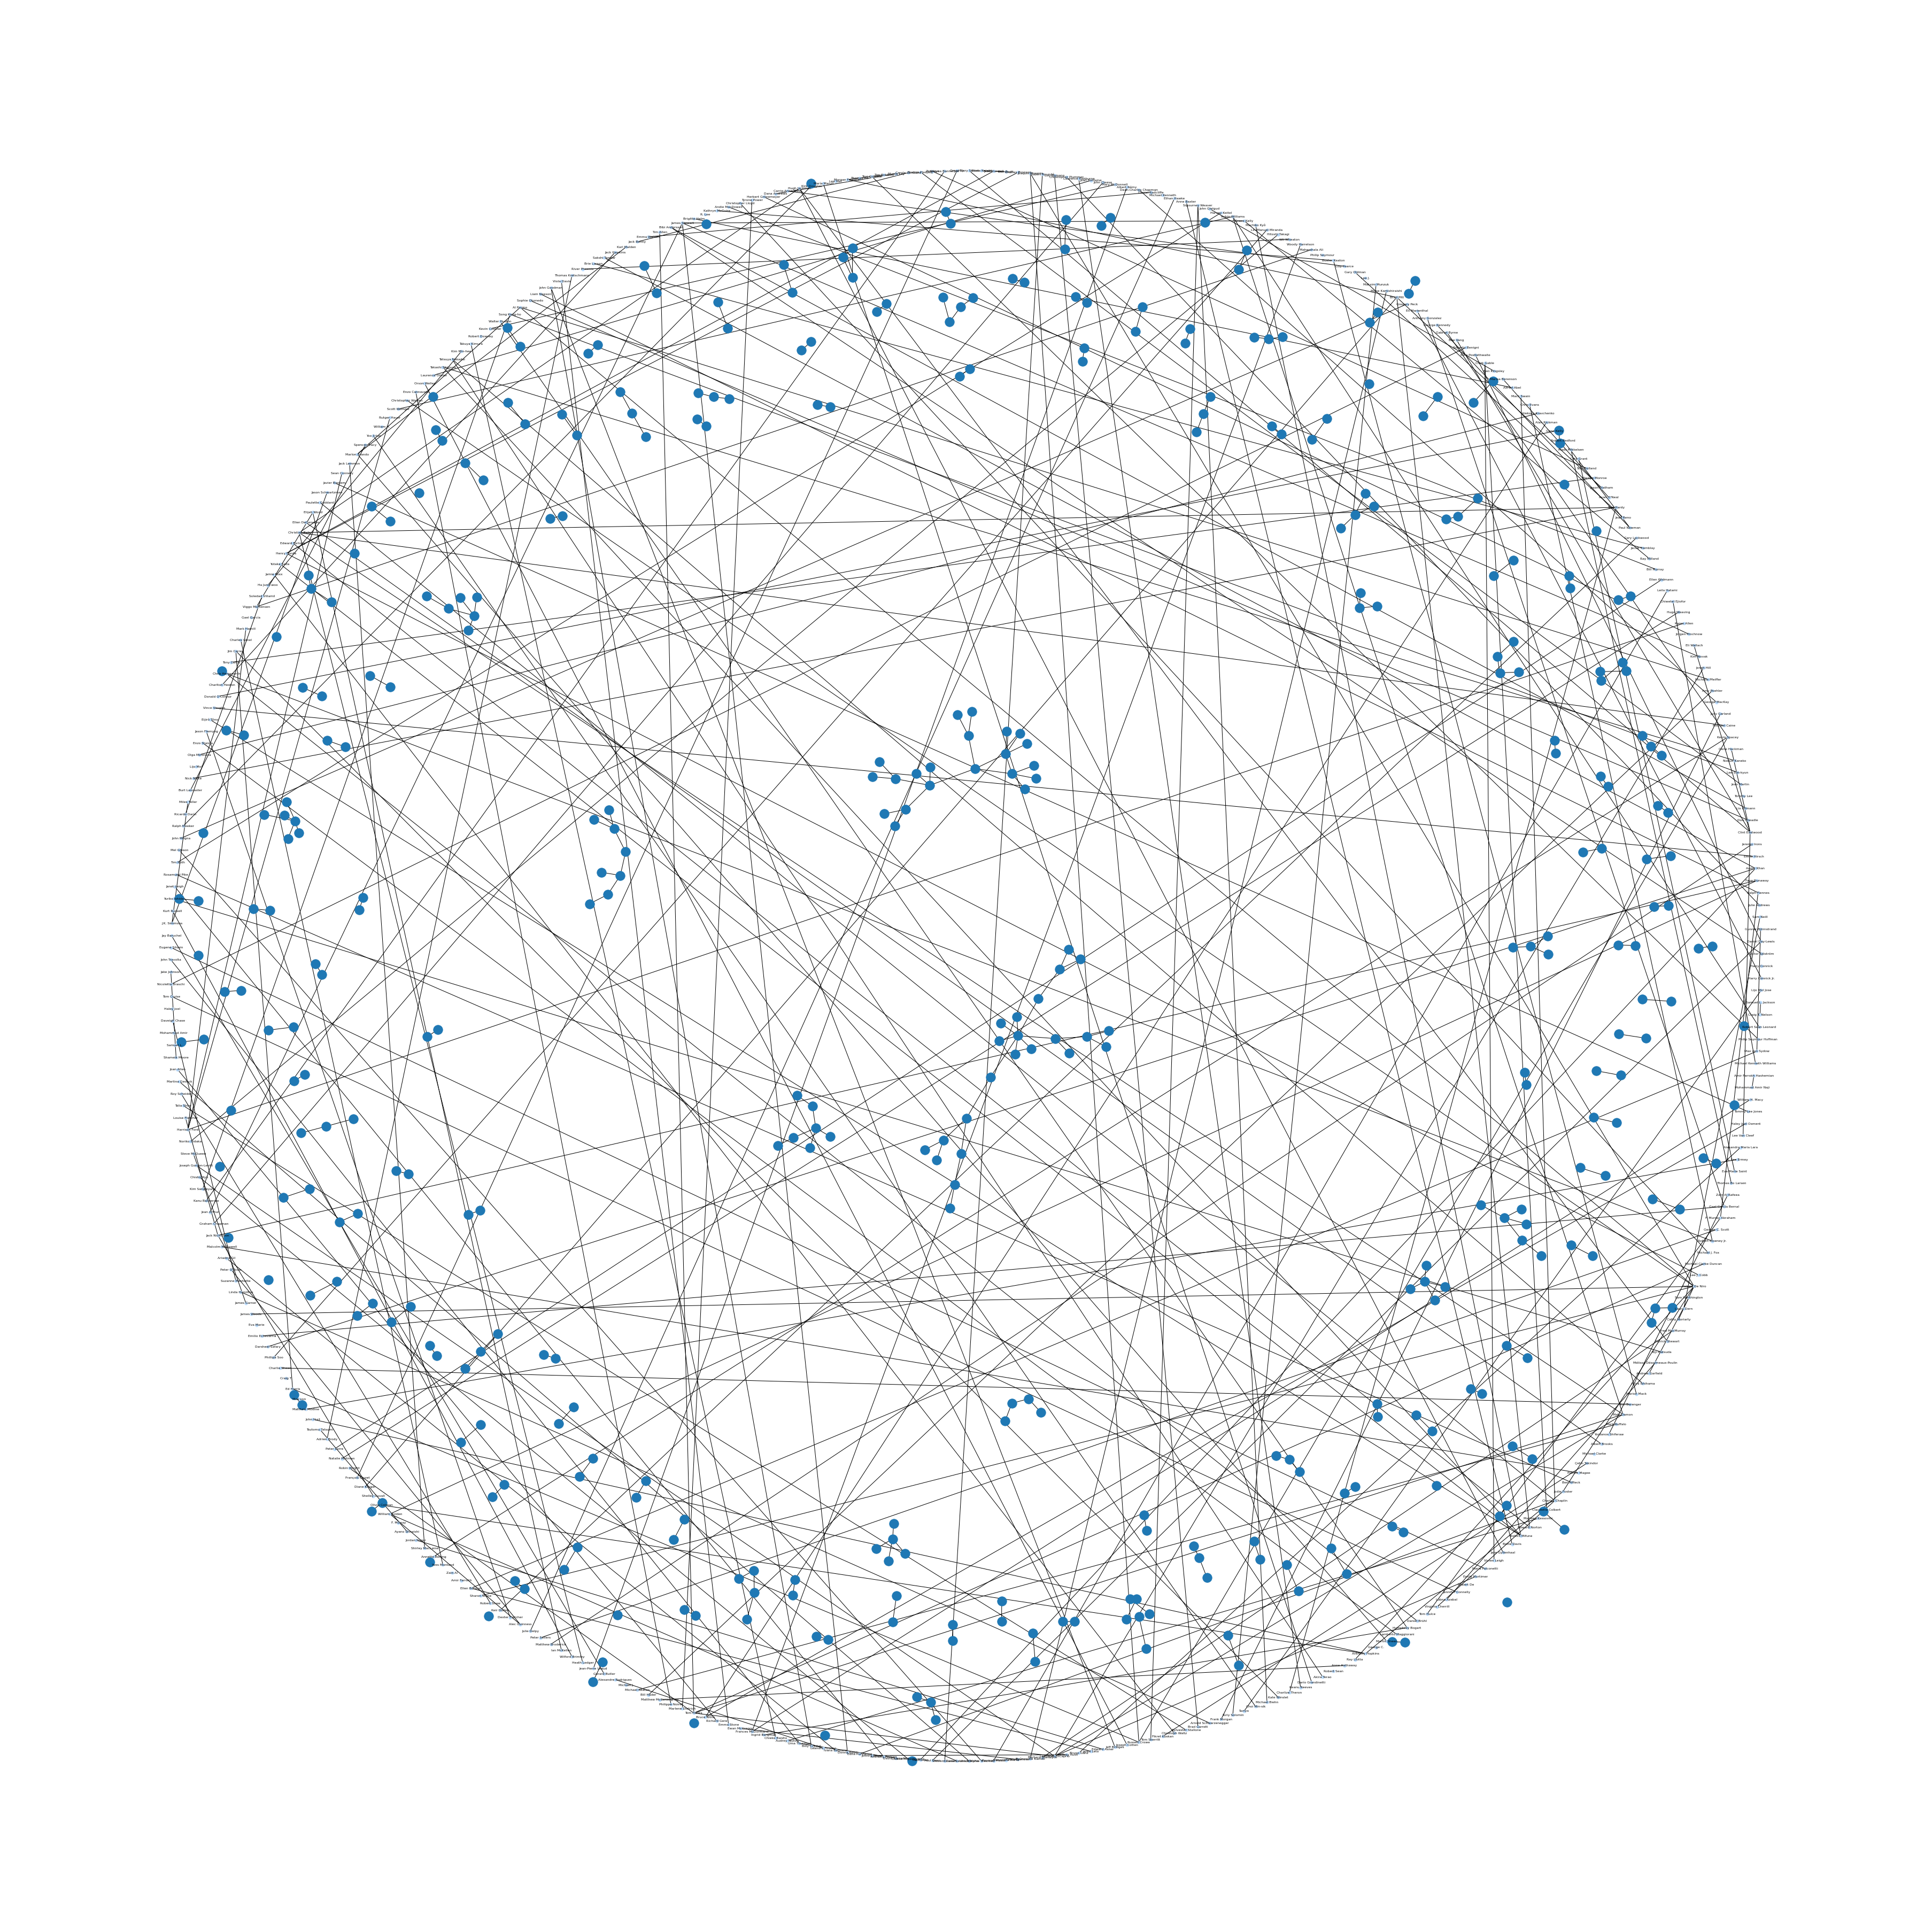

In [20]:
#was meant to make a graph with edges but got too tired to complete it.
#if you uncomment line 15-24 it'll plot the nodes of the first 7 actors.
#7 being an arbitrary value for the purpose of testing

actors = [Act.makeActor(item) for item in set_of_actors] #list of actor objects
# pprint(actors)

import math
import numpy as np


# #adding an edge between actors
# #for person in 


actor_graph = nx.Graph()
for actor in actors:
  actor_graph.add_node(actor.name)

for actorNode in crew:
  actor_graph.add_edge(actorNode[0], actorNode[1])


plt.figure(3,figsize=(50,50))
nx.draw_circular(actor_graph,
                 node_color='#bbddff',
                 font_size = 6,
                 node_size=25,
                 with_labels=True)
plt.axis('equal')
pos = nx.spring_layout(actor_graph)
nx.draw(actor_graph,pos)

# plt.show()

From here onwards I didn't do much since it was the code we wrote together

In [21]:
movie_id = 'tt1950186' #random movie id i picked from data['items'] in 4th code block

url = f'https://imdb-api.com/en/API/FullCast/k_w26fb6h9/{movie_id}'

response = requests.request("GET", url, headers={}, data={})

data = json.loads(response.text)
# pprint(data)

fullcast=[]
fullcast = [(actor['name'],
            actor['id'],
            actor['image']) for actor in data['actors']]
# pprint(fullcast)

"""
NOTED THAT FULLCAST ABOVE CONTAINS THE CAST OF ONE MOVIE ONLY. HOWEVER,
FULLCAST IN THE CODE BELOW CONTAINS A LIST OF DICTIONARIES (MOVIE ID BEING KEY AND LIST OF ACTORS BEING VALUE)
OF ALL THE CAST MEMBERS FROM THE APIs DATABASE
MEANING IT MAKES A TOTAL OF 250 REQUESTS
"""


# fullcast = [dict(id=[(cast_member['name'], 
#                       cast_member['id'], 
#                       cast_member['image']) 
#                       for cast_member in json.loads(requests.request("GET",
#                                                                      f'https://imdb-api.com/en/API/FullCast/k_w26fb6h9/{id}', 
#                                                                      headers={}, 
#                                                                      data={}).text)['actors']])
#                                                                      for (title, id, image) in movies]


# no_picture = len([1 for tup in fullcast if 'nopicture' in tup[2]])
# no_picture

# fullcast = [[data['actors'][i]['name'], 
#              data['actors'][i]['id'], 
#              data['actors'][i]['image']] 
#             for i in range(len(data['actors']))]

'\nNOTED THAT FULLCAST ABOVE CONTAINS THE CAST OF ONE MOVIE ONLY. HOWEVER,\nFULLCAST IN THE CODE BELOW CONTAINS A LIST OF DICTIONARIES (MOVIE ID BEING KEY AND LIST OF ACTORS BEING VALUE)\nOF ALL THE CAST MEMBERS FROM THE APIs DATABASE\nMEANING IT MAKES A TOTAL OF 250 REQUESTS\n'

In [22]:
# Movielist = [Movie.createMovie(movieInfo[0], movieInfo[1], movieInfo[2]) for movieInfo in movies]
# pprint(Movielist)

# Actorlist = [Actor.createActor(actorInfo[0], actorInfo[1], actorInfo[2]) for actorInfo in fullcast]
# pprint(Actorlist)


MovieObjects = [Movie.createMovie(title, id, image) for (title, id, image) in movies]
pprint(MovieObjects)

ActorObjects = [Actor.createActor(name, id, image) for (name, id, image) in fullcast]
pprint(ActorObjects)

[Movie(title='The Shawshank Redemption', id='tt0111161', image='https://m.media-amazon.com/images/M/MV5BMDFkYTc0MGEtZmNhMC00ZDIzLWFmNTEtODM1ZmRlYWMwMWFmXkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_Ratio0.6716_AL_.jpg'),
 Movie(title='The Godfather', id='tt0068646', image='https://m.media-amazon.com/images/M/MV5BM2MyNjYxNmUtYTAwNi00MTYxLWJmNWYtYzZlODY3ZTk3OTFlXkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_Ratio0.7015_AL_.jpg'),
 Movie(title='The Dark Knight', id='tt0468569', image='https://m.media-amazon.com/images/M/MV5BMTMxNTMwODM0NF5BMl5BanBnXkFtZTcwODAyMTk2Mw@@._V1_Ratio0.6716_AL_.jpg'),
 Movie(title='The Godfather Part II', id='tt0071562', image='https://m.media-amazon.com/images/M/MV5BMWMwMGQzZTItY2JlNC00OWZiLWIyMDctNDk2ZDQ2YjRjMWQ0XkEyXkFqcGdeQXVyNzkwMjQ5NzM@._V1_Ratio0.7015_AL_.jpg'),
 Movie(title='12 Angry Men', id='tt0050083', image='https://m.media-amazon.com/images/M/MV5BMWU4N2FjNzYtNTVkNC00NzQ0LTg0MjAtYTJlMjFhNGUxZDFmXkEyXkFqcGdeQXVyNjc1NTYyMjg@._V1_Ratio0.6716_AL_.jpg'),
 Movie(title="Schindler's L

In [23]:
acted = [group for group in crew if 'Henry Fonda' in group]
print(acted)

[['Henry Fonda', 'Lee J. Cobb'], ['Henry Fonda', 'Charles Bronson'], ['Henry Fonda', 'Jane Darwell']]


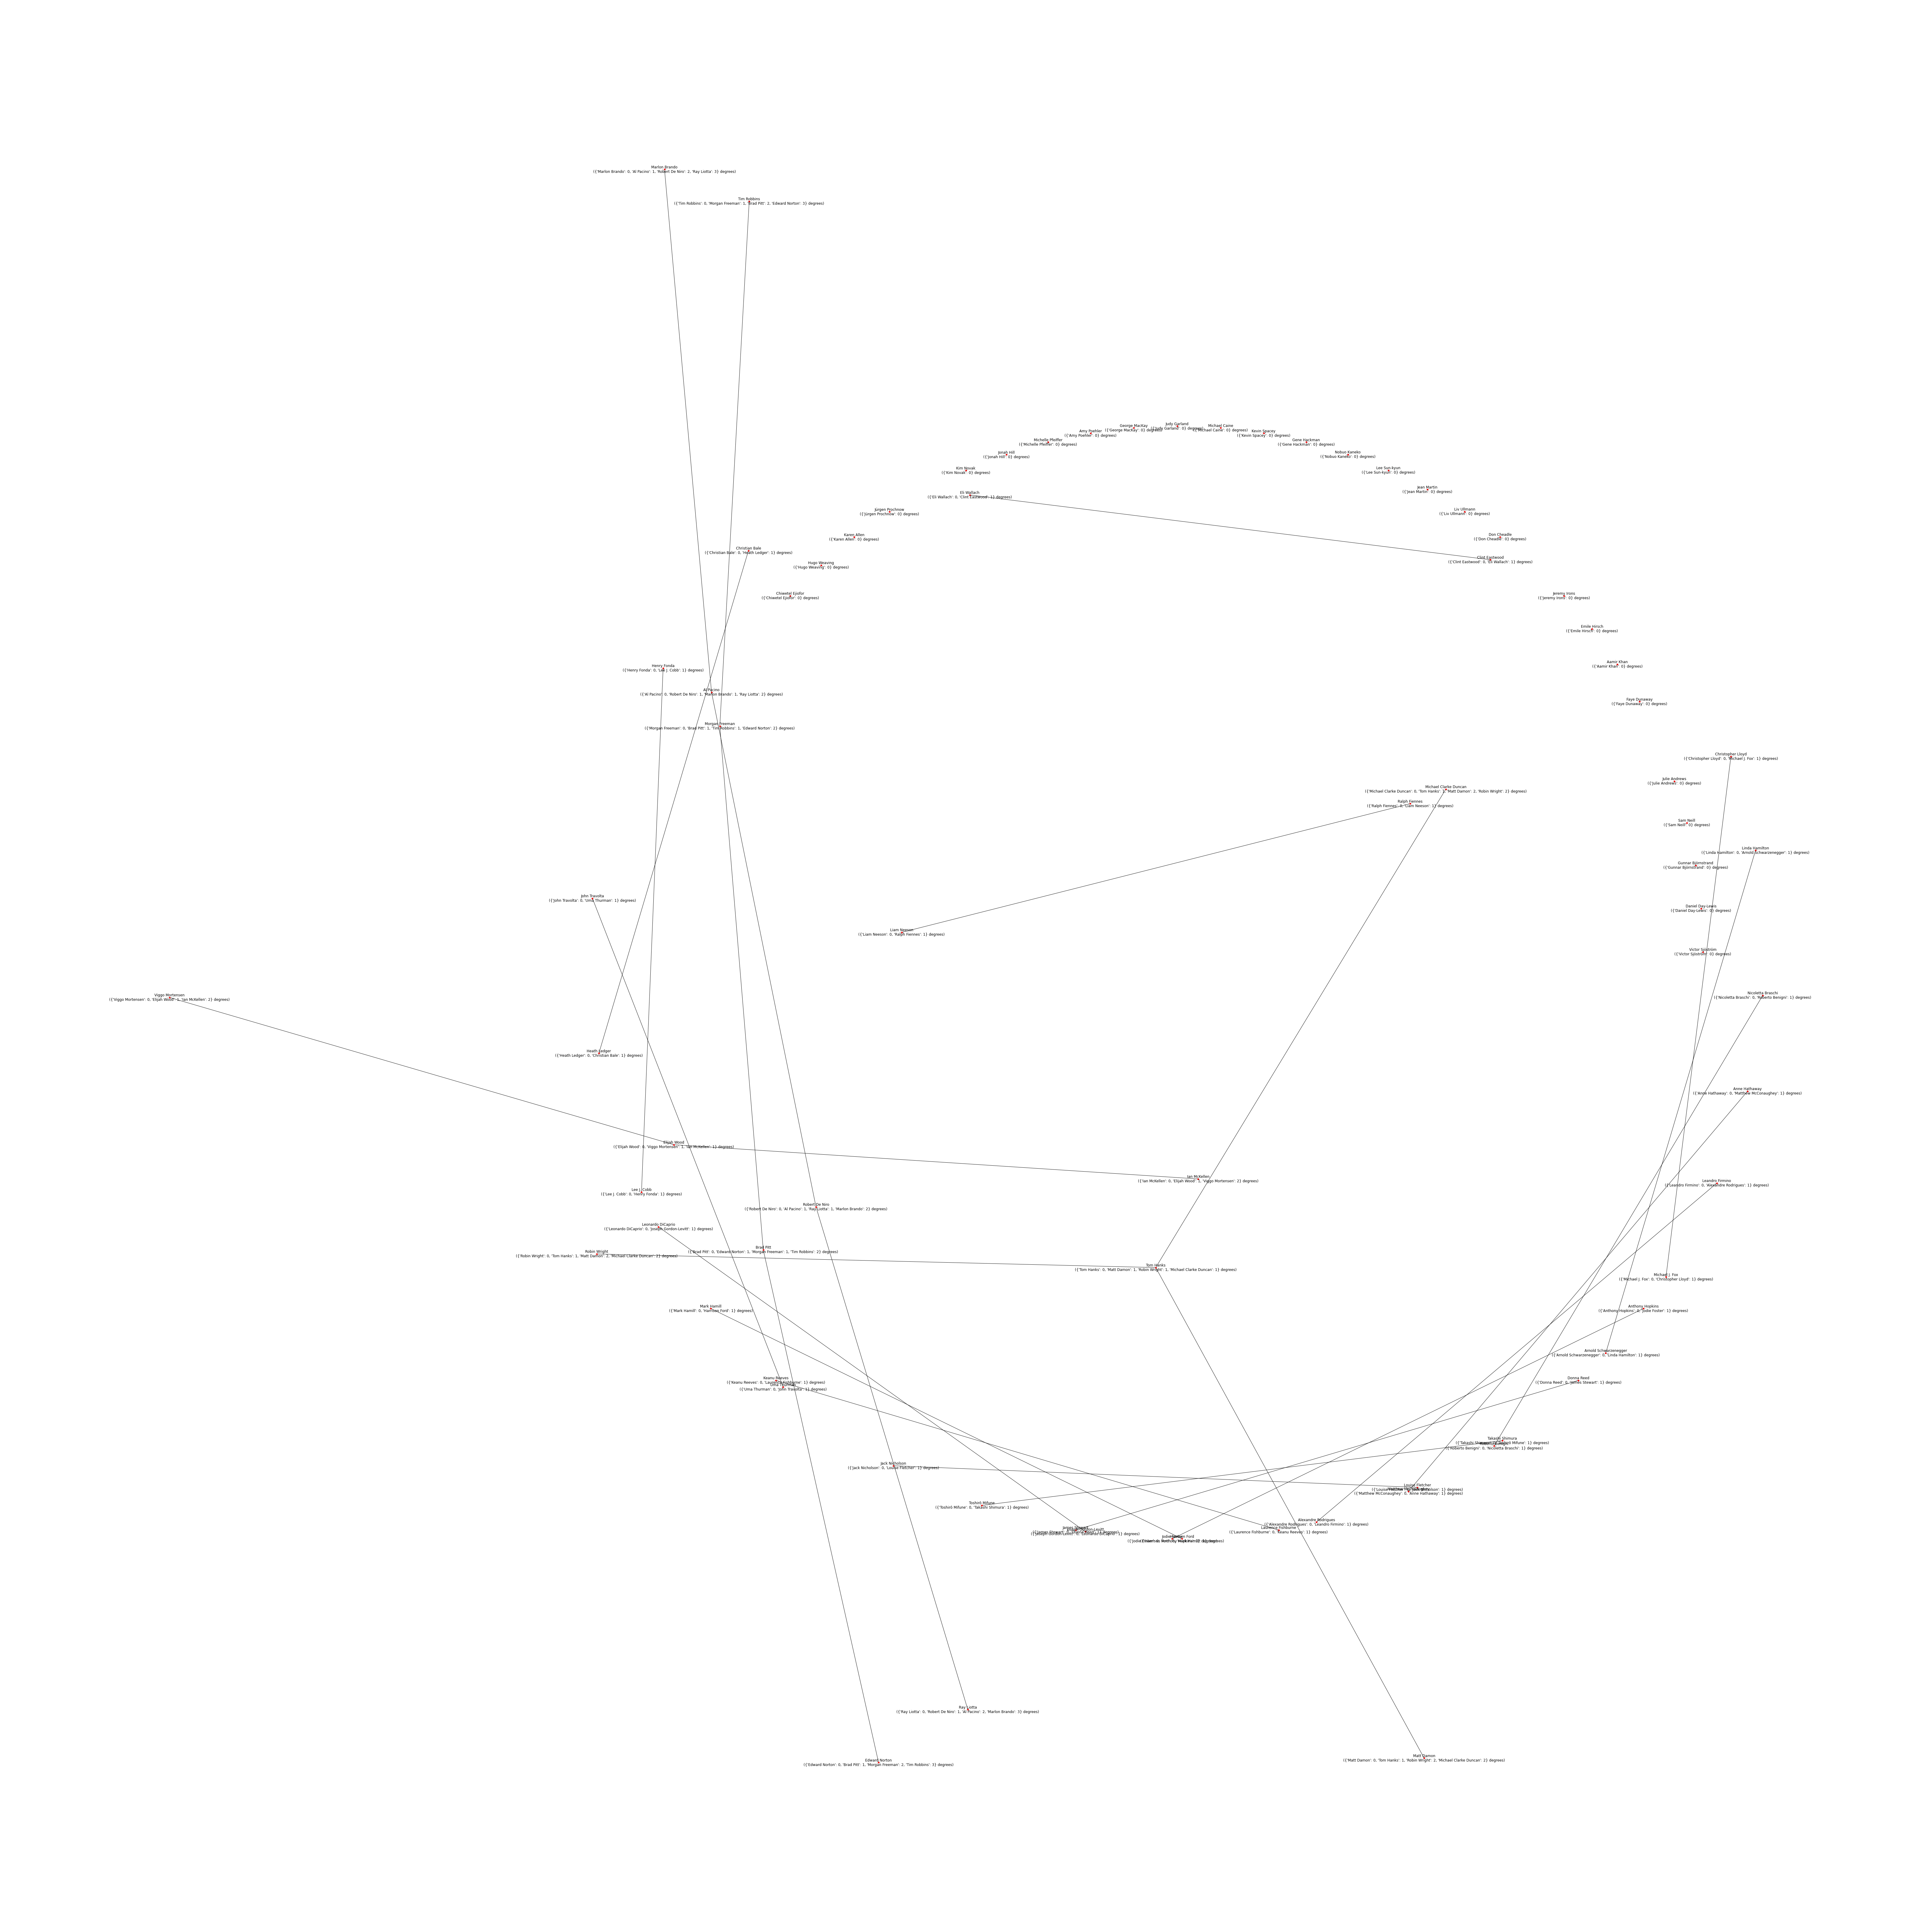

In [30]:
# crew, allActors
allActorsList = list(allActors)


crew = crew[:30]
allActorsList = allActorsList[:30]

# # Create a graph
# G = nx.Graph()

# # Add nodes to the graph
# G.add_nodes_from(allActorsList)

# # Add edges to the graph
# G.add_edges_from(crew)

# # Draw the graph with all edges between nodes
# # nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')

# plt.figure(3,figsize=(45,45))
# # nx.draw_spring(G,
# #                  node_color='red',
# #                  font_size = 22,
# #                  node_size=600,
# #                  with_labels=True)
# # plt.axis('equal')
# # pos = nx.spring_layout(G, with_labels=True)
# # nx.draw(G,pos)
# pos = nx.kamada_kawai_layout(G)
# nx.draw(G, pos, with_labels=True)
# nx.draw_networkx_labels(G, pos)


# # Show the graph
# plt.show()


# Create a graph
G = nx.Graph()

# Add nodes to the graph
G.add_nodes_from(allActorsList)

# Add edges to the graph
G.add_edges_from(crew)

# Calculate shortest path lengths between all pairs of nodes
path_lengths = dict(nx.shortest_path_length(G))

# Draw the graph with node labels indicating degree of separation
pos = nx.kamada_kawai_layout(G)
plt.figure(3,figsize=(90,90))
nx.draw(G, pos, node_color='red',
                 font_size = 2,
                 node_size=20,
                 with_labels=True)
labels = {actor: f"{actor}\n({degree} degrees)" for actor, degree in path_lengths.items()}
nx.draw_networkx_labels(G, pos, labels=labels)

# Show the graph
plt.show()